In [2]:
import pandas as pd
# load parquet

# Specify the path to your Parquet file
parquet_file_path = '../data/raw/loc/veterans_history_project.parquet'

# Read the Parquet file into a Pandas DataFrame
df = pd.read_parquet(parquet_file_path)

In [3]:
# column names checker
# note: date/ dats are related to dates of service/ war campaigns
df.columns

Index(['access_restricted', 'aka', 'campaigns', 'contributor',
       'contributor_interviewer', 'contributor_organization',
       'contributor_veteran', 'date', 'dates', 'description', 'digitized',
       'extract_timestamp', 'group', 'hassegments', 'id', 'image_url', 'index',
       'item', 'language', 'location', 'location_home', 'location_service',
       'method', 'mime_type', 'number', 'number_collection',
       'number_date_created', 'number_date_modified', 'online_format',
       'original_format', 'partof', 'resources', 'shelf_id', 'subject',
       'subject_battles', 'subject_branch', 'subject_conflict',
       'subject_entrance', 'subject_format', 'subject_gender', 'subject_rank',
       'subject_status', 'subject_unit', 'timestamp', 'title', 'url',
       'subject_race', 'number_pow', 'segments', 'partof_serving_our_voices',
       'type'],
      dtype='object')

In [4]:
# extract year of record creation as a proxy of the age of media
df['number_date_created_first_itm'] = df['number_date_created'].apply(lambda x: x[0])
df['year_record_created'] = df['number_date_created_first_itm'].str.extract(r'^(\d{4})').astype(int)
df = df.sort_values(by='year_record_created', ascending=True)

<Axes: >

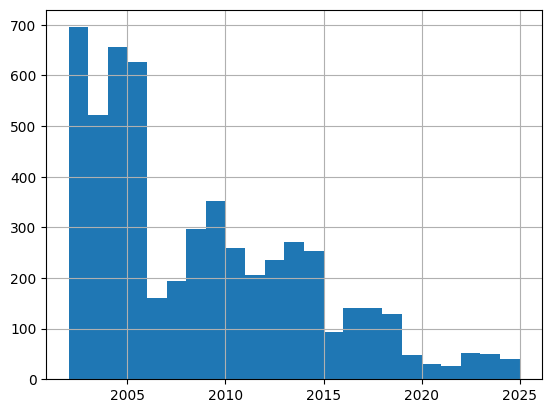

In [5]:
import matplotlib
bins = df['year_record_created'].max() - df['year_record_created'].min()
df['year_record_created'].hist(bins = bins)

In [6]:
df_pre2010 = df[df['year_record_created']<=2010]
df_pre2010.to_parquet('../data/raw/loc/veterans_history_project_pre2010.parquet', index=False)

In [9]:
df_pre2010.iloc[0]

access_restricted                                                            False
aka                              [http://www.loc.gov/item/afc2001001.00704/, fi...
campaigns                                                                       []
contributor                      [schmidt, karen, cumbee, amanda, medina high s...
contributor_interviewer                                           [cumbee, amanda]
contributor_organization                                      [medina high school]
contributor_veteran                                             [zarney, elmer a.]
date                                                                          1943
dates                                                             [[1943 TO 1945]]
description                      [Captain, Army Air Forces/Corps, World War, 19...
digitized                                                                     True
extract_timestamp                                         2025-10-18T19:52:48.618Z
grou

In [11]:
range(len(df_pre2010))

range(0, 3761)

In [23]:
df_pre2010 = df_pre2010.reset_index(drop=True)

In [26]:
# reconstruct the dataframe where each row contains only one media resource
l_collection_numbers = []
for n in range(len(df_pre2010)):
    collection_number = df_pre2010['item'][n]['collection_number']
    # print(collection_number)
    l_collection_numbers.append(collection_number)

In [27]:
# retrieve resource DataFrame from the parquet file
df_resources = pd.read_parquet('../data/raw/loc/veterans_history_project_resources.parquet')

In [ ]:
# check if the item collection numbers are unique
print(len(l_collection_numbers))
print(len(set(l_collection_numbers)))

3761
3761


In [ ]:
df_resources_filtered = df_resources[df_resources['collection_number'].isin(l_collection_numbers)]

In [33]:
# save the DataFrame to a parquet file
df_resources_filtered.to_parquet('../data/raw/loc/veterans_history_project_resources_pre2010.parquet', index=False)